In [38]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from census import Census
from pprint import pprint
from scipy.stats import linregress
# import gmaps

# Google API Key
from config import gkey

# Incorporated citipy to determine latitude and longitude based on city 
from citipy import citipy


In [2]:
# Import CSV and create a df for cities
us_cities_to_load="us_cities.csv"

us_cities_df=pd.read_csv(us_cities_to_load)

us_cities_df=us_cities_df.rename(columns={'city':'City','state_name':'State','lat':'Latitude','lng':'Longitude',
                                          'population':'Population'})

us_cities_df.drop(us_cities_df.columns[[1,2,4,5,9,10,11,12,13,14,15,16]], axis=1, inplace=True)

us_cities_df=us_cities_df.loc[us_cities_df['Population']>=250000]

us_cities_df["Restaurant Name"]=""
us_cities_df["Restaurant Type"]=""
us_cities_df["Rating"]=""
us_cities_df["Number of Reviews"]=""

us_cities_df.head()

,City,State,Latitude,Longitude,Population,Restaurant Name,Restaurant Type,Rating,Number of Reviews
0,New York,New York,40.6943,-73.9249,18713220,,,,
1,Los Angeles,California,34.1139,-118.4068,12750807,,,,
2,Chicago,Illinois,41.8373,-87.6862,8604203,,,,
3,Miami,Florida,25.7839,-80.2102,6445545,,,,
4,Dallas,Texas,32.7936,-96.7662,5743938,,,,


In [68]:
# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
print(json.dumps(places_data, indent=4, sort_keys=True))


{
    "html_attributions": [],
    "next_page_token": "Aap_uEBkb3LdW__B6Ot4QGFhsnDSILKq12Vj46oiO5hC1B7WYqgdSUQuAXXYvENtRQ0ZTidLzzSdbTOB6FDOC7KMxap4rEe9w5ZffJGI_CDzayi13lZqHSi9zkzXlcMGRBRt23uRxvjOFgvVi7qeLdbltggO5faX_y5GdZSx5OadE-R-qg1AgUwWbE7pA8F1gF2hQENiROXNAjO_Ye2k-VYYP95pc-0jb32hXfDrkrewat7yyIUfP95vx5EgJ9_H_GjON2HxSzwuI_lZANSmNLxBUj_hrN1rW_0QiLDpjoVUwjKEPh2eHo4l20CExfU0uvFzK0bl0EUYy_NHmRHxo7eG1SwA0gX1a95lFcfG92HIwKURUeTcgEHePEcLEzf_Gm6GEiFrs-y7C5oP02XNR3o2-CvWkfCypU9-PT1t1_mqIQyuupPKntZD33vSXROGVDLsujGXRLm-tx0x",
    "results": [
        {
            "business_status": "OPERATIONAL",
            "geometry": {
                "location": {
                    "lat": 41.8001161,
                    "lng": -87.73513349999999
                },
                "viewport": {
                    "northeast": {
                        "lat": 41.80135597989273,
                        "lng": -87.73375532010728
                    },
                    "southwest": {
                      

# Denver

In [3]:
target_coordinates = "39.7621, -104.8759"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# frame_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input=input=location=33.753746%2C+-84.386330&keyword=mexican&radius=1000&type=restaurant&key=API_KEY_HERE"  

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
#     "Restaurant":name,
#     "Rating":rating,
#     "Business Status":business_status,
#     "user_ratings_total":user_ratings_total,
#     "latitude":latitude,
#     "longitude":longitude,
#     "vicinity":vicinity,
#     "price_level":price_level
    
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
    
    
} 
# establish dataframe
denver_dataframe = pd.DataFrame(review_dict)
denver_dataframe



Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Rocky Mountain Sudanese's restaurant,4.9,0,86,39.739778,-104.869816,"10180 E Colfax Ave, Aurora",CLOSED_TEMPORARILY
1,FIFTY300 Restaurant,3.8,0,21,39.769882,-104.903991,"3801 Quebec St, Denver",OPERATIONAL
2,Ted'z Place Restaurant and Lounge,4.5,2,813,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City",OPERATIONAL
3,Sapp Bros Cafe,4.0,2,496,39.784888,-104.904559,"7120 E 49th Ave, Commerce City",OPERATIONAL
4,Café Mercato,4.4,2,370,39.719425,-104.896602,"7561 E Academy Blvd, Denver",OPERATIONAL
5,El Muelle Mexican Restaurant,3.8,0,119,39.723649,-104.820766,"475 Sable Blvd, Aurora",OPERATIONAL
6,Phở 888,4.5,1,1220,39.724193,-104.821438,"Parking lot, 539 Sable Blvd, Aurora",OPERATIONAL
7,La Sandia,4.0,2,960,39.782148,-104.891528,"8340 Northfield Blvd Unit 1690, Denver",OPERATIONAL
8,Restaurante El Tamarindo,4.1,0,285,39.739806,-104.898394,"7700 E Colfax Ave, Denver",OPERATIONAL
9,El Chalate Restaurant,4.2,1,975,39.740361,-104.893448,"8119 E Colfax Ave, Denver",OPERATIONAL


# Chicago

In [67]:
target_coordinates = "41.8373, -87.6862"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# frame_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input=input=location=33.753746%2C+-84.386330&keyword=mexican&radius=1000&type=restaurant&key=API_KEY_HERE"  

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        
#         if places_data["results"][r]["rating"]>= 4.0:
#                 rating.append(places_data["results"][r]["rating"])
        
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
#     "Restaurant":name,
#     "Rating":rating,
#     "Business Status":business_status,
#     "user_ratings_total":user_ratings_total,
#     "latitude":latitude,
#     "longitude":longitude,
#     "vicinity":vicinity,
#     "price_level":price_level
    
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
    
    
} 
# establish dataframe
chicago_dataframe = pd.DataFrame(review_dict)
chicago_dataframe

Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Red Barrel Restaurant,4.4,2,586,41.800116,-87.735133,"5214 S Archer Ave, Chicago",OPERATIONAL
1,Bridgeport Restaurant,4.2,1,768,41.830575,-87.646404,"3500 S Halsted St, Chicago",OPERATIONAL
2,The Village,4.5,2,3483,41.880538,-87.630205,"71 W Monroe St, Chicago",OPERATIONAL
3,Palace Grill Restaurant,4.6,1,785,41.881677,-87.662498,"1408 W Madison St, Chicago",OPERATIONAL
4,Harvey's Family Restaurant,4.4,1,246,41.837725,-87.643382,"657 W 31st St, Chicago",OPERATIONAL
5,Rivers Restaurant,4.2,2,431,41.880834,-87.637123,"30 S Wacker Dr, Chicago",OPERATIONAL
6,Manjares Restaurant,4.3,2,770,41.851318,-87.666411,"2230 S Ashland Ave, Chicago",OPERATIONAL
7,Parkview Restaurant Grill,4.6,1,239,41.856027,-87.676114,"2000 W 19th St, Chicago",OPERATIONAL
8,Los Langostinos Restaurant,4.5,2,287,41.837021,-87.722984,"3059 S Harding Ave, Chicago",OPERATIONAL
9,Eppel's Restaurant,4.5,1,1008,41.867403,-87.641464,"554 Roosevelt Rd, Chicago",OPERATIONAL


# New Orleans

In [5]:
target_coordinates = "30.0687, -89.9288"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# frame_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input=input=location=33.753746%2C+-84.386330&keyword=mexican&radius=1000&type=restaurant&key=API_KEY_HERE"  

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
#     "Restaurant":name,
#     "Rating":rating,
#     "Business Status":business_status,
#     "user_ratings_total":user_ratings_total,
#     "latitude":latitude,
#     "longitude":longitude,
#     "vicinity":vicinity,
#     "price_level":price_level
    
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
    
    
} 
# establish dataframe
new_orleans_dataframe = pd.DataFrame(review_dict)
new_orleans_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Madchef at 59th,4.4,0,211,30.040686,-89.954955,"5941 Bullard Ave #7, New Orleans",OPERATIONAL
1,Bullard Seafood and Grill,4.3,1,1159,30.048147,-89.962168,"7025 Bullard Ave, New Orleans",OPERATIONAL
2,Vucinovich's,4.7,1,264,30.029991,-89.927849,"4510 Michoud Blvd, New Orleans",OPERATIONAL
3,Burritos Grill Mexican Fresh Cuisine,4.4,0,332,30.038738,-89.976972,"7009 Read Blvd, New Orleans",OPERATIONAL
4,Mi Frida Foodtruck llc,5.0,0,1,30.048901,-89.955797,"12300 I-10 Service Rd, New Orleans",OPERATIONAL
5,Don Villaraso,0.0,0,0,30.038714,-89.971751,"I-10 Service Rd, New Orleans",OPERATIONAL
6,Tempo Creole Cuisine,5.0,2,9,30.040188,-89.955104,"5931 Bullard Ave #7, New Orleans",OPERATIONAL
7,Perkins Landing,0.0,0,0,30.057435,-89.968539,"11960 Hayne Blvd, New Orleans",OPERATIONAL
8,Easy Seafood,4.5,1,187,30.032148,-89.928627,"Ye Ole Village Shopping Center, 13243 Chef Men...",OPERATIONAL
9,Julie's Kitchen,4.5,1,194,30.030429,-89.970854,"5609 Read Blvd, New Orleans",OPERATIONAL


# Jacksonville

In [6]:
target_coordinates = "30.3322, -81.6749"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# frame_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input=input=location=33.753746%2C+-84.386330&keyword=mexican&radius=1000&type=restaurant&key=API_KEY_HERE"  

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
#     "Restaurant":name,
#     "Rating":rating,
#     "Business Status":business_status,
#     "user_ratings_total":user_ratings_total,
#     "latitude":latitude,
#     "longitude":longitude,
#     "vicinity":vicinity,
#     "price_level":price_level
    
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
    
    
} 
# establish dataframe
jacksonville_dataframe = pd.DataFrame(review_dict)
jacksonville_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,BB's Restaurant and Bar,4.6,3,1395,30.315838,-81.654509,"1019 Hendricks Ave, Jacksonville",OPERATIONAL
1,Brick Restaurant,4.4,2,1284,30.296844,-81.704198,"3585 St Johns Ave, Jacksonville",OPERATIONAL
2,Taverna,4.5,2,1240,30.303865,-81.654724,"1986 San Marco Blvd, Jacksonville",OPERATIONAL
3,Restaurant Orsay,4.7,3,1619,30.300268,-81.709976,"3630 Park St, Jacksonville",OPERATIONAL
4,Bellwether,4.6,2,541,30.327611,-81.659926,"117 W Forsyth St, Jacksonville",OPERATIONAL
5,Primi Piatti,4.6,0,283,30.310058,-81.694199,"2722 Park St, Jacksonville",OPERATIONAL
6,The Cookbook Restaurant,4.4,0,440,30.346675,-81.658350,"1827 N Pearl St, Jacksonville",OPERATIONAL
7,Fox Restaurant,4.6,1,936,30.296585,-81.703712,"3580 St Johns Ave, Jacksonville",OPERATIONAL
8,Biscottis,4.7,2,1103,30.297039,-81.703290,"3556 St Johns Ave, Jacksonville",OPERATIONAL
9,Matthew's Restaurant,4.7,4,452,30.303936,-81.652263,"2107 Hendricks Ave, Jacksonville",OPERATIONAL


# Memphis

In [7]:
target_coordinates = "35.1046, -89.9773"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# frame_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input=input=location=33.753746%2C+-84.386330&keyword=mexican&radius=1000&type=restaurant&key=API_KEY_HERE"  

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
#     "Restaurant":name,
#     "Rating":rating,
#     "Business Status":business_status,
#     "user_ratings_total":user_ratings_total,
#     "latitude":latitude,
#     "longitude":longitude,
#     "vicinity":vicinity,
#     "price_level":price_level
    
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
    
    
} 
# establish dataframe
memphis_dataframe = pd.DataFrame(review_dict)
memphis_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Barksdale Restaurant,4.5,1,575,35.132111,-89.990585,"237 Cooper St, Memphis",OPERATIONAL
1,Cafe Society,4.4,3,214,35.143731,-90.003090,"212 N Evergreen St #5210, Memphis",OPERATIONAL
2,Soul Fish Cafe,4.6,2,2726,35.122172,-89.990589,"862 Cooper St, Memphis",OPERATIONAL
3,Casablanca Restaurant,4.4,2,804,35.137927,-90.004344,"1707 Madison Ave, Memphis",OPERATIONAL
4,Char Restaurant,4.5,3,1555,35.119552,-89.946040,"431 S Highland St #120, Memphis",OPERATIONAL
5,Sweet Grass,4.5,2,232,35.120023,-89.991311,"937 Cooper St, Memphis",CLOSED_TEMPORARILY
6,Cafe Ole,4.0,2,896,35.119441,-89.991225,"959 Cooper St, Memphis",OPERATIONAL
7,Cupboard,4.3,1,2278,35.136948,-90.015154,"1400 Union Ave, Memphis",OPERATIONAL
8,Castle Restaurant,4.6,0,200,35.107798,-89.929484,"3992 Park Ave, Memphis",OPERATIONAL
9,Tsunami,4.7,3,162,35.120392,-89.990775,"928 Cooper St, Memphis",OPERATIONAL


# Ralegh

In [8]:
target_coordinates = "35.8325, -78.6435"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# frame_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input=input=location=33.753746%2C+-84.386330&keyword=mexican&radius=1000&type=restaurant&key=API_KEY_HERE"  

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
#     "Restaurant":name,
#     "Rating":rating,
#     "Business Status":business_status,
#     "user_ratings_total":user_ratings_total,
#     "latitude":latitude,
#     "longitude":longitude,
#     "vicinity":vicinity,
#     "price_level":price_level
    
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
    
    
} 
# establish dataframe
ralegh_dataframe = pd.DataFrame(review_dict)
ralegh_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Crawford and Son,4.7,3,525,35.788800,-78.634141,"618 N Person St, Raleigh",OPERATIONAL
1,Vic's Italian Restaurant & Pizzeria,4.4,2,736,35.815293,-78.697240,"4035 Lake Boone Trail STE 109, Raleigh",OPERATIONAL
2,Cafe Tiramisu,4.7,2,201,35.865180,-78.619090,"6008 Falls of Neuse Rd, Raleigh",OPERATIONAL
3,Jolie Restaurant,4.6,0,194,35.788859,-78.634177,"620 N Person St, Raleigh",OPERATIONAL
4,Cantina 18,4.3,2,622,35.789912,-78.661678,"433 Daniels St, Raleigh",OPERATIONAL
5,Salt & Lime Cabo Grill,4.5,2,1733,35.865153,-78.619087,"6006 Falls of Neuse Rd, Raleigh",OPERATIONAL
6,The Melting Pot,4.3,3,908,35.824252,-78.621291,"3100 Wake Forest Rd, Raleigh",OPERATIONAL
7,Bloomsbury Bistro,4.6,3,282,35.804037,-78.644615,"509-101 W Whitaker Mill Rd, Raleigh",OPERATIONAL
8,J. Alexander's Restaurant,4.5,3,2069,35.840579,-78.684468,"4600 Crabtree Valley Ave, Raleigh",OPERATIONAL
9,Midtown Grille,4.3,3,391,35.839825,-78.643333,"4421 Six Forks Rd #115, Raleigh",OPERATIONAL


# Baltimore

In [9]:
target_coordinates = "39.3051, -76.6144"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# frame_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input=input=location=33.753746%2C+-84.386330&keyword=mexican&radius=1000&type=restaurant&key=API_KEY_HERE"  

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
#     "Restaurant":name,
#     "Rating":rating,
#     "Business Status":business_status,
#     "user_ratings_total":user_ratings_total,
#     "latitude":latitude,
#     "longitude":longitude,
#     "vicinity":vicinity,
#     "price_level":price_level
    
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
    
    
} 
# establish dataframe
baltimore_dataframe = pd.DataFrame(review_dict)
baltimore_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,The Helmand,4.6,2,797,39.299038,-76.615904,"806 N Charles St, Baltimore",OPERATIONAL
1,Telltale Restaurant,4.0,0,40,39.288563,-76.614930,Baltimore,CLOSED_TEMPORARILY
2,Maximón,4.4,0,395,39.282389,-76.602543,"200 International Drive, Baltimore",OPERATIONAL
3,La Calle Restaurant,4.7,2,317,39.289168,-76.611170,"10 South St, Baltimore",OPERATIONAL
4,Tagliata,4.5,3,940,39.284398,-76.599692,"1012 Fleet St, Baltimore",OPERATIONAL
5,Peppa Flame Restaurant and Lounge,4.2,2,226,39.270611,-76.594201,"1401 E Clement St, Baltimore",OPERATIONAL
6,Mi Comalito Restaurant and Bar 2101 North Char...,4.4,1,345,39.313366,-76.616349,"2101 N Charles St, Baltimore",OPERATIONAL
7,Cafe Gia Ristorante,4.5,2,470,39.285359,-76.601377,"410 S High St, Baltimore",OPERATIONAL
8,Chef BobbyD Restaurant and Catering,4.5,2,393,39.337440,-76.637526,"4032 Falls Rd, Baltimore",OPERATIONAL
9,Forno Restaurant + Wine Bar,4.3,2,466,39.289980,-76.620716,"17 N Eutaw St, Baltimore",OPERATIONAL


# St.louis

In [10]:
target_coordinates = "38.6358, -90.2451"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# frame_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input=input=location=33.753746%2C+-84.386330&keyword=mexican&radius=1000&type=restaurant&key=API_KEY_HERE"  

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
#     "Restaurant":name,
#     "Rating":rating,
#     "Business Status":business_status,
#     "user_ratings_total":user_ratings_total,
#     "latitude":latitude,
#     "longitude":longitude,
#     "vicinity":vicinity,
#     "price_level":price_level
    
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
    
    
} 
# establish dataframe
st_louis_dataframe = pd.DataFrame(review_dict)
st_louis_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Beffa's Bar & Restaurant,4.7,0,220,38.633448,-90.216786,"2700 Olive St, St. Louis",OPERATIONAL
1,Sultan Mediterranean Restaurant,4.7,2,697,38.627149,-90.254366,"4200 Manchester Ave, St. Louis",OPERATIONAL
2,Layla,4.5,2,1710,38.627153,-90.257573,"4317 Manchester Ave, St. Louis",OPERATIONAL
3,Biggie's Restaurant,4.5,2,873,38.601621,-90.299116,"3332 Watson Rd, St. Louis",OPERATIONAL
4,Lombardo's Trattoria,4.5,3,746,38.627969,-90.210179,"Lower Level of Drury Inn, 201 S 20th St, St. L...",OPERATIONAL
5,Stone Turtle Restaurant and Bar,4.5,2,458,38.628704,-90.292728,"6335 Clayton Ave, St. Louis",OPERATIONAL
6,Eclipse Restaurant,4.0,2,110,38.655805,-90.298809,"6177 Delmar Blvd, St. Louis",OPERATIONAL
7,Guido's Pizzeria & Tapas,4.5,2,1647,38.617568,-90.270421,"5046 Shaw Ave, St. Louis",OPERATIONAL
8,Bulrush StL Restaurant,4.9,0,159,38.638005,-90.226554,"3307 Washington Ave, St. Louis",OPERATIONAL
9,Cunetto House of Pasta,4.6,2,1489,38.610341,-90.280272,"5453 Magnolia Ave, St. Louis",OPERATIONAL


# Washington

In [11]:
target_coordinates = "38.9047, -77.0163"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# frame_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input=input=location=33.753746%2C+-84.386330&keyword=mexican&radius=1000&type=restaurant&key=API_KEY_HERE"  

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
#     "Restaurant":name,
#     "Rating":rating,
#     "Business Status":business_status,
#     "user_ratings_total":user_ratings_total,
#     "latitude":latitude,
#     "longitude":longitude,
#     "vicinity":vicinity,
#     "price_level":price_level
    
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
    
    
} 
# establish dataframe
washington_dataframe = pd.DataFrame(review_dict)
washington_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,LiLLiES Restaurant & Bar,4.3,2,417,38.928496,-77.054074,"2915 Connecticut Ave NW, Washington",OPERATIONAL
1,The Monocle Restaurant,4.6,3,380,38.894580,-77.005171,"107 D St NE, Washington",OPERATIONAL
2,Old Ebbitt Grill,4.6,2,12589,38.897948,-77.033248,"675 15th St NW, Washington",OPERATIONAL
3,RPM Italian,4.5,3,1954,38.902256,-77.021236,"650 K St NW, Washington",OPERATIONAL
4,1789 Restaurant & Bar,4.6,4,471,38.906028,-77.070409,"1226 36th St NW, Washington",OPERATIONAL
5,Juniper Restaurant,4.0,3,39,38.905467,-77.051933,"2401 M St NW, Washington",OPERATIONAL
6,Annabelle,4.4,0,106,38.912755,-77.047208,"2132 Florida Ave NW, Washington",OPERATIONAL
7,Siroc Restaurant,4.4,2,402,38.901832,-77.033242,"915 15th St NW, Washington",OPERATIONAL
8,North Italia,4.4,2,640,38.901442,-77.047932,"2112 Pennsylvania Avenue NW Ste 102, Washington",OPERATIONAL
9,Mezè Restaurant,4.5,2,460,38.921488,-77.041922,"2437 18th St NW, Washington",OPERATIONAL


# Providence

In [12]:
target_coordinates = "41.8230, -71.4187"
# target_search = "mexican"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# frame_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input=input=location=33.753746%2C+-84.386330&keyword=mexican&radius=1000&type=restaurant&key=API_KEY_HERE"  

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    
# Print the json (pretty printed)
# print(json.dumps(places_data, indent=4, sort_keys=True))

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
#     "Restaurant":name,
#     "Rating":rating,
#     "Business Status":business_status,
#     "user_ratings_total":user_ratings_total,
#     "latitude":latitude,
#     "longitude":longitude,
#     "vicinity":vicinity,
#     "price_level":price_level
    
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
    
    
} 
# establish dataframe
providence_dataframe = pd.DataFrame(review_dict)
providence_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Hemenway's Restaurant,4.6,4,1515,41.824213,-71.406913,"121 S Main St, Providence",OPERATIONAL
1,IL Fornello Restaurant,4.6,2,367,41.861128,-71.423071,"16 Josephine St, North Providence",OPERATIONAL
2,Louis Family Restaurant,4.4,1,335,41.824643,-71.399099,"286 Brook St, Providence",OPERATIONAL
3,Twin Oaks Restaurant,4.4,2,2719,41.789111,-71.441200,"100 Sabra St, Cranston",OPERATIONAL
4,Madeira Restaurant,4.1,2,908,41.814294,-71.371906,"288 Warren Ave, East Providence",OPERATIONAL
5,Cafe Nuovo,4.7,3,610,41.827419,-71.410736,"One Citizens Plaza, Providence",OPERATIONAL
6,Marchetti's Restaurant,4.6,2,2732,41.783285,-71.463589,"1463 Park Ave, Cranston",OPERATIONAL
7,MamaJuana Restaurant Pawtucket RI,4.5,0,276,41.866920,-71.398619,"904 Main St, Pawtucket",OPERATIONAL
8,Layali Restaurant Bar,4.7,0,193,41.824233,-71.409481,"36 Weybosset St, Providence",OPERATIONAL
9,Mills Tavern,4.5,3,353,41.828063,-71.409143,"101 N Main St, Providence",OPERATIONAL


In [13]:
# mergeing the dataframes
country_df = [denver_dataframe,chicago_dataframe, 
                 new_orleans_dataframe, jacksonville_dataframe, 
                 memphis_dataframe, ralegh_dataframe, baltimore_dataframe, 
                 st_louis_dataframe, washington_dataframe, providence_dataframe]
result = pd.concat(country_df)
display(result)

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Rocky Mountain Sudanese's restaurant,4.9,0,86,39.739778,-104.869816,"10180 E Colfax Ave, Aurora",CLOSED_TEMPORARILY
1,FIFTY300 Restaurant,3.8,0,21,39.769882,-104.903991,"3801 Quebec St, Denver",OPERATIONAL
2,Ted'z Place Restaurant and Lounge,4.5,2,813,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City",OPERATIONAL
3,Sapp Bros Cafe,4.0,2,496,39.784888,-104.904559,"7120 E 49th Ave, Commerce City",OPERATIONAL
4,Café Mercato,4.4,2,370,39.719425,-104.896602,"7561 E Academy Blvd, Denver",OPERATIONAL
...,...,...,...,...,...,...,...,...
15,Pito Restaurant,4.5,1,418,41.796756,-71.413152,"1029 Broad St, Providence",OPERATIONAL
16,Mi Porcion Restaurant,4.6,0,21,41.823109,-71.450477,"319 Manton Ave, Providence",OPERATIONAL
17,Joe Marzilli's Old Canteen Italian Restaurant,4.6,2,515,41.823164,-71.421970,"120 Atwells Ave, Providence",OPERATIONAL
18,Scarlets Restaurant,4.3,2,83,41.827423,-71.443643,"99 Academy Ave #4539, Providence",OPERATIONAL


In [26]:
result =  result.reset_index(drop=True) 
result =  result.reset_index(drop=True) 

In [27]:
display(result)

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status
0,Rocky Mountain Sudanese's restaurant,4.9,0,86,39.739778,-104.869816,"10180 E Colfax Ave, Aurora",CLOSED_TEMPORARILY
1,FIFTY300 Restaurant,3.8,0,21,39.769882,-104.903991,"3801 Quebec St, Denver",OPERATIONAL
2,Ted'z Place Restaurant and Lounge,4.5,2,813,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City",OPERATIONAL
3,Sapp Bros Cafe,4.0,2,496,39.784888,-104.904559,"7120 E 49th Ave, Commerce City",OPERATIONAL
4,Café Mercato,4.4,2,370,39.719425,-104.896602,"7561 E Academy Blvd, Denver",OPERATIONAL
...,...,...,...,...,...,...,...,...
195,Pito Restaurant,4.5,1,418,41.796756,-71.413152,"1029 Broad St, Providence",OPERATIONAL
196,Mi Porcion Restaurant,4.6,0,21,41.823109,-71.450477,"319 Manton Ave, Providence",OPERATIONAL
197,Joe Marzilli's Old Canteen Italian Restaurant,4.6,2,515,41.823164,-71.421970,"120 Atwells Ave, Providence",OPERATIONAL
198,Scarlets Restaurant,4.3,2,83,41.827423,-71.443643,"99 Academy Ave #4539, Providence",OPERATIONAL


# Charts 

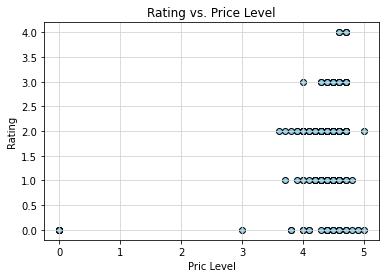

In [33]:
# Rating vs. Price Level

plt.scatter(result["Rating"],result["price_level"],edgecolors="black",facecolors="skyblue")
# title
plt.title("Rating vs. Price Level")
# x-axis
plt.xlabel("Price Level")
# y-axis
plt.ylabel("Rating")
# how the grid looks
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save as a png to the figures folder
# plt.savefig("./figures/(name here))
plt.show()

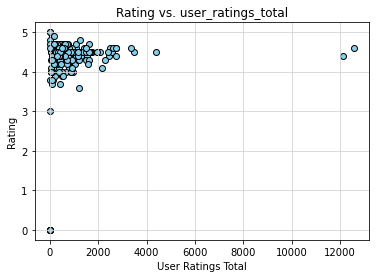

In [41]:
#  "Restaurant":name,
#     "Rating":rating,
#     "price_level":price_level,
#     "user_ratings_total":user_ratings_total,
#     "latitude":latitude,
#     "longitude":longitude,
#     "vicinity":vicinity,
#     "Business Status":business_status

# Rating vs. user_ratings_total

plt.scatter(result["user_ratings_total"],result["Rating"],edgecolors="black",facecolors="skyblue")
# title
plt.title("Rating vs. user_ratings_total")
# x-axis
plt.xlabel("User Ratings Total")
# y-axis
plt.ylabel("Rating")
# how the grid looks
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save as a png to the figures folder
# plt.savefig("./figures/(name here))
plt.show()

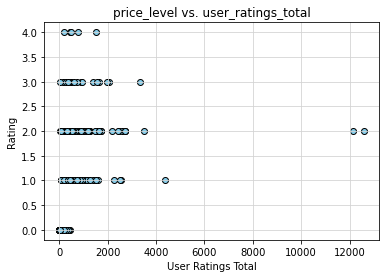

In [42]:
#  "Restaurant":name,
#     "Rating":rating,
#     "price_level":price_level,
#     "user_ratings_total":user_ratings_total,
#     "latitude":latitude,
#     "longitude":longitude,
#     "vicinity":vicinity,
#     "Business Status":business_status

# price_level vs. user_ratings_total

plt.scatter(result["user_ratings_total"],result["price_level"],edgecolors="black",facecolors="skyblue")
# title
plt.title("price_level vs. user_ratings_total")
# x-axis
plt.xlabel("User Ratings Total")
# y-axis
plt.ylabel("Rating")
# how the grid looks
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save as a png to the figures folder
# plt.savefig("./figures/(name here))
plt.show()

In [45]:
# Create a function to create Linear Regression plots

# x_values: first variable
# y_values: second variable
# regEQplotX: control the location where the linear regression equation appears on the plot x line
# regEQplotY: control the location where the linear regression equation appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-square is {rvalue}")
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
#     plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()

The r-square is 0.2816530531130429
y = 0.37x + -0.03


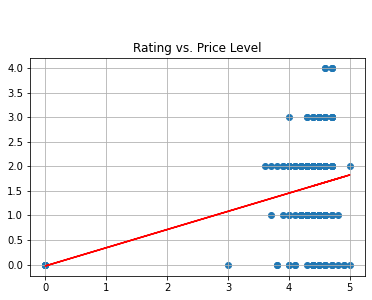

In [55]:
#set the data sets to compare
x_values = result["Rating"]
y_values = result["price_level"]
#move the equations to where it can be seen
regEQplotX = 2
regEQplotY = 5
#label the y axis
y_label = ""
#title
plt.title(f"Rating vs. Price Level")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the figures folder
# plt.savefig("./figures/(name here)", bbox_inches='tight')
plt.show()

The r-square is 0.12204670693508
y = 226.68x + -141.58


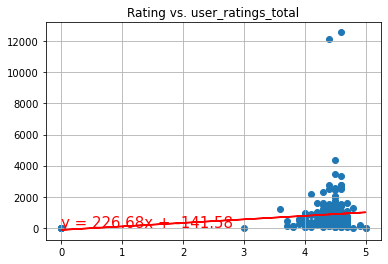

In [56]:
#set the data sets to compare
x_values = result["Rating"]
y_values = result["user_ratings_total"]
#move the equations to where it can be seen
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = ""
#title
plt.title(f"Rating vs. user_ratings_total")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the figures folder
# plt.savefig("./figures/(name here)", bbox_inches='tight')
plt.show()

The r-square is 0.2816530531130429
y = 0.37x + -0.03


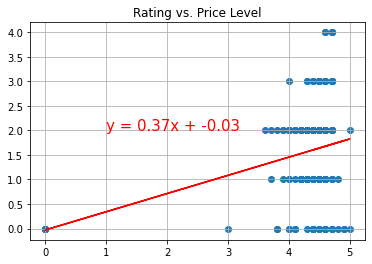

In [59]:
#set the data sets to compare
x_values = result["Rating"]
y_values = result["price_level"]
#move the equations to where it can be seen
regEQplotX = 1
regEQplotY = 2
#label the y axis
y_label = ""
#title
plt.title(f"Rating vs. Price Level")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the figures folder
# plt.savefig("./figures/(name here)", bbox_inches='tight')
plt.show()